# Advertising Sales Channel Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [4]:
#load data set

df=pd.read_csv('Advertising.csv')

In [7]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.shape

(200, 5)

In [10]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [13]:
df=df.drop('Unnamed: 0',axis=1)

In [14]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [16]:
df.isnull().sum()     #no null vales present

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Data description.

--->The company wants to check which platform is good to give advertising of the company to get good sales. 
--->Data Set contains TV, radio, Newspaper channel details to predict the best platform to get good sales.
---->Data Set contains 4 columns(including target variable) and 200 rows.The task is to predict the right sales channel to generate good revenue. 
--->The target variable is continuous. So, we use regression model.

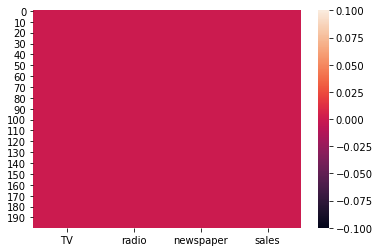

In [17]:
sns.heatmap(df.isnull())
plt.show()

# Statistical Summary

In [18]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Observation: 

1) for 50th median value of mean is more for radio & newspaper leads to outliers present in these two columns. 
2) There is a large difference in 75th median and max in the TV & newspaper columns,so outliers present in these two columns.

In [19]:
corr=df.corr()

In [20]:
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


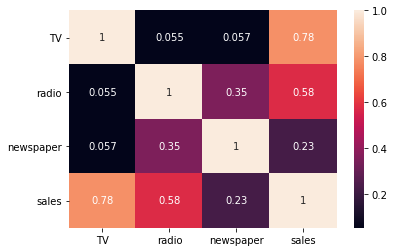

In [22]:
sns.heatmap(corr,annot=True)
plt.show()

From the above heatmap, there is no negative correlation. 

. We can see that advertising through Tv and radio provides the highest sales to the company. So, let's check closely the correlation between TV, radio, and sales. However, the newspaper is showing the lowest correlation. So advertising in a newspaper will not get good sales for the company. So we can drop it for further process.

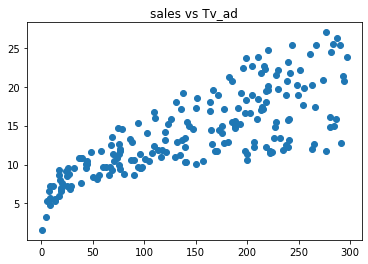

In [23]:
plt.title('sales vs Tv_ad')
plt.scatter(df['TV'],df['sales'])
plt.show()

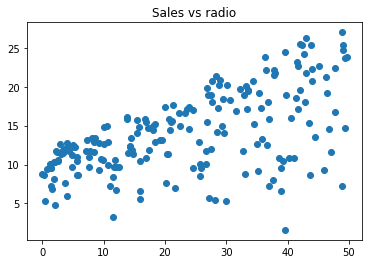

In [24]:
plt.title('Sales vs radio')
plt.scatter(df['radio'],df['sales'])
plt.show()

We can see that there is positive linear relation ship in the above scatter plots. So the company has to select TV and radio for advertisment to generate good revenue. The best is TV. So we will take Tv, radio and Sales columns for splitting the data.

In [25]:
x=df.drop(['newspaper','sales'],axis=1)
y=df['sales']

# Skewness and Outliers

In [26]:
x.skew()

TV      -0.069853
radio    0.094175
dtype: float64

Taking the threshold value +/-0.5, We see that there is no skewness in the data.

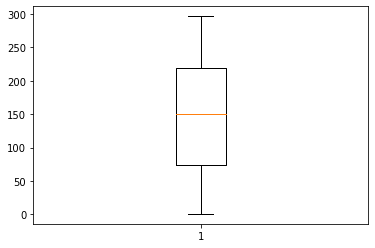

In [27]:
plt.boxplot(df['TV'])
plt.show()

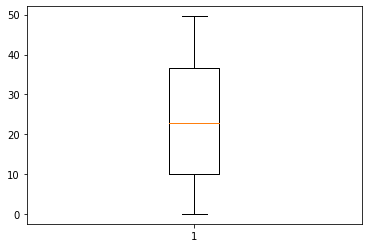

In [28]:
plt.boxplot(df['radio'])
plt.show()

From the above box plots we can see that there are no outliers in the data.

# Best Random State Model

In [29]:
print(x.shape)
print(y.shape)

(200, 2)
(200,)


In [30]:
lr=LinearRegression()

In [31]:
maxAccu=0
maxRS=0
for i in range (1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    predr=lr.predict(x_test)
    acc=r2_score(y_test,predr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(maxAccu)
print(maxRS)

0.9332116756936784
13


We have found the best random_state value as 13 with a 93% r2_score. So, we will create the train_test_split using this random_state(13).


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [33]:
dr=DecisionTreeRegressor()
svr=SVR() 
rf=RandomForestRegressor()

In [34]:
model=[lr,dr,svr,rf]

In [35]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=13)
    m.fit(x_train,y_train)
    predl=m.predict(x_test)
    print('r2_score of',m,'is:')
    print(r2_score(y_test,predl))
    print('mean_squared_error:',mean_squared_error(y_test,predl))
    print('mean_absolute_error:',mean_absolute_error(y_test,predl))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predl)))
    print('\n')

r2_score of LinearRegression() is:
0.9332116756936784
mean_squared_error: 2.116464670622304
mean_absolute_error: 1.2175373257978157
root_mean_squared_error 1.4548074342064328


r2_score of DecisionTreeRegressor() is:
0.9709942706452815
mean_squared_error: 0.919166666666666
mean_absolute_error: 0.7449999999999998
root_mean_squared_error 0.9587318012179767


r2_score of SVR() is:
0.8307354629106862
mean_squared_error: 5.363847894966018
mean_absolute_error: 1.6787408791180034
root_mean_squared_error 2.315998250207892


r2_score of RandomForestRegressor() is:
0.9779376584566165
mean_squared_error: 0.6991366666666646
mean_absolute_error: 0.6567333333333327
root_mean_squared_error 0.8361439270045945




We can see that RandomforestRegressor is providing the best accuracy score of 98% also DecisionTreeRegressor is providing 97% accuracy. It may be due to over_fitting also. So we will do cross-validation.


# cross validation.

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
lrs=cross_val_score(lr,x,y,scoring='r2',cv=5)
print('LinearRegression cross_val_score:',lrs.mean())

LinearRegression cross_val_score: 0.889282957306453


In [38]:
drs=cross_val_score(dr,x,y,scoring='r2',cv=5) 
print('DecisionTreeRegressor cross_val_score:',drs.mean())

DecisionTreeRegressor cross_val_score: 0.9623554149369478


In [39]:
svs=cross_val_score(svr,x,y,scoring='r2',cv=5)
print('SVR cross_val_score:',svs.mean())

SVR cross_val_score: 0.8643453266859801


In [40]:
rfr=cross_val_score(rf,x,y,scoring='r2',cv=5)     
print('RandomforestRegressor cross_val_score:',rfr.mean())

RandomforestRegressor cross_val_score: 0.9780904034990512


We can see that RandomforestRegressor is performing well with 97% by doing cross-validation. We will check the best estimator. We can use Hyper Parameter Tuning.

# Hyper Parameter Tuning.

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
grid_param={'criterion':['mse','mae']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='r2',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'mse'}


In [43]:
gd_pred=gd.best_estimator_.predict(x_test)

In [44]:
gd_pred

array([12.844,  3.995, 15.454, 12.998, 11.616, 25.244, 20.73 , 13.259,
       24.329, 15.47 , 17.056,  7.251,  9.599, 16.975, 14.572, 16.226,
        5.602, 11.138, 20.395, 18.285, 11.78 ,  9.63 , 21.15 , 12.894,
       17.04 , 19.839, 10.205, 12.004, 23.384,  4.889, 15.756, 19.412,
       18.57 ,  8.809, 17.576,  9.926, 11.12 , 22.515,  7.858, 11.713,
       10.468, 19.215, 22.353,  5.456, 12.355, 22.021, 19.346, 11.311,
        8.877, 22.144, 20.569, 10.624, 11.037, 11.858,  9.564, 14.869,
       24.294,  7.415,  6.223, 10.017])

In [45]:
r2_score(y_test,gd_pred)

0.9979421289679404

Now we can see that after doing hyperparameter tunning the r2_score is 99% with best_parameter 'mse'. This is our best model.

# Saving the Model.

In [46]:
import pickle
filename = 'Advertising.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion

In [48]:
loaded_model = pickle.load(open('Advertising.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9779376584566165


In [50]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],gd_pred[:]],index=["Predicted","Orginal"])

In [51]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,13.124,4.888,15.292,13.007,11.666,24.402,19.601,13.104,23.266,15.237,...,20.274,10.899,11.051,12.354,9.588,15.373,23.155,7.050,6.721,10.105
Orginal,12.844,3.995,15.454,12.998,11.616,25.244,20.730,13.259,24.329,15.470,...,20.569,10.624,11.037,11.858,9.564,14.869,24.294,7.415,6.223,10.017
